# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import fitz  # PyMuPDF
import re
from tqdm import tqdm

# === RUTAS ===
BASE_DIR = r"C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest"
DATA_DIR = os.path.join(BASE_DIR, "data")
RESUME_CSV_PATH = os.path.join(BASE_DIR, "Resume", "Resume.csv")

# === 1. Extraer texto de PDFs ===
def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text("text")
    return text

# === 2. Limpieza básica ===
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # reemplaza múltiples espacios/saltos
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # elimina caracteres no ASCII
    return text.strip()

# === 3. Recorrer todas las carpetas dentro de data ===
records = []
print("Extrayendo texto de los PDFs...\n")

for folder in tqdm(os.listdir(DATA_DIR)):
    folder_path = os.path.join(DATA_DIR, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".pdf"):
                pdf_path = os.path.join(folder_path, file)
                try:
                    text = extract_text_from_pdf(pdf_path)
                    clean = clean_text(text)
                    records.append({
                        "category": folder,
                        "filename": file,
                        "text": clean
                    })
                except Exception as e:
                    print(f"❌ Error procesando {file}: {e}")

df_pdfs = pd.DataFrame(records)
print(f"\n✅ Total de archivos PDF procesados: {len(df_pdfs)}")
print(df_pdfs.head())

# === 4. Calcular métricas básicas ===
df_pdfs["num_chars"] = df_pdfs["text"].apply(len)
df_pdfs["num_words"] = df_pdfs["text"].apply(lambda x: len(x.split()))

# === 5. Cargar CSV original (si existe) ===
if os.path.exists(RESUME_CSV_PATH):
    print("\nCargando Resume.csv...")
    df_resume = pd.read_csv(RESUME_CSV_PATH)
    print(f"Columnas del CSV original: {list(df_resume.columns)}")

    # unir si hay columna compatible (usa 'Category' o similar)
    if "Category" in df_resume.columns:
        df_final = pd.merge(df_pdfs, df_resume, left_on="category", right_on="Category", how="left")
    else:
        df_final = df_pdfs.copy()
        print("⚠️ No se encontró columna 'Category' para unir. Se deja el dataset solo con PDFs.")
else:
    print("\n⚠️ No se encontró Resume.csv. Solo se usará el texto de los PDFs.")
    df_final = df_pdfs.copy()

# === 6. Guardar dataset consolidado ===
OUTPUT_PATH = os.path.join(BASE_DIR, "dataset_consolidado.csv")
df_final.to_csv(OUTPUT_PATH, index=False, encoding="utf-8")
print(f"\n💾 Dataset consolidado guardado en:\n{OUTPUT_PATH}")

# === 7. Resumen ===
print("\nResumen general:")
print(df_final.groupby("category")[["num_words", "num_chars"]].mean().round(1))


ModuleNotFoundError: No module named 'fitz'

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest\dataset_consolidado.csv")
df.head()


,category,filename,text,num_chars,num_words,ID,Resume_str,Resume_html,Category
0,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466,15906625,ACCOUNTANT Professional Summary...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
1,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466,30361788,ACCOUNTANT Summary Innovat...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
2,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466,21031285,ACCOUNTANT Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
3,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466,25749150,ACCOUNTANT Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
4,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466,12338274,ACCOUNTANT Summary To pursue...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT


In [5]:
cols_keep = ['category', 'filename', 'text', 'num_chars', 'num_words']
df_clean = df[cols_keep].copy()

# Quitar duplicados por texto o filename
df_clean = df_clean.drop_duplicates(subset=['text'])

print(df_clean.shape)
df_clean.head()


(2482, 5)


,category,filename,text,num_chars,num_words
0,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466
118,ACCOUNTANT,10674770.pdf,STAFF ACCOUNTANT Summary Highly analytical and...,7473,1042
236,ACCOUNTANT,11163645.pdf,ACCOUNTANT Professional Summary To obtain a po...,4721,621
354,ACCOUNTANT,11759079.pdf,SENIOR ACCOUNTANT Experience Company Name June...,5917,849
472,ACCOUNTANT,12065211.pdf,SENIOR ACCOUNTANT Professional Summary Senior ...,5555,782


In [6]:
import pandas as pd
import os

base_path = r"C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest\resume"

for file in os.listdir(base_path):
    if file.endswith(".csv"):
        path = os.path.join(base_path, file)
        df = pd.read_csv(path)
        print(f"\n=== {file} ===")
        print(df.shape)
        print(df.columns)
        print(df.head(2))



=== Resume.csv ===
(2484, 4)
Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  


<Axes: xlabel='category'>

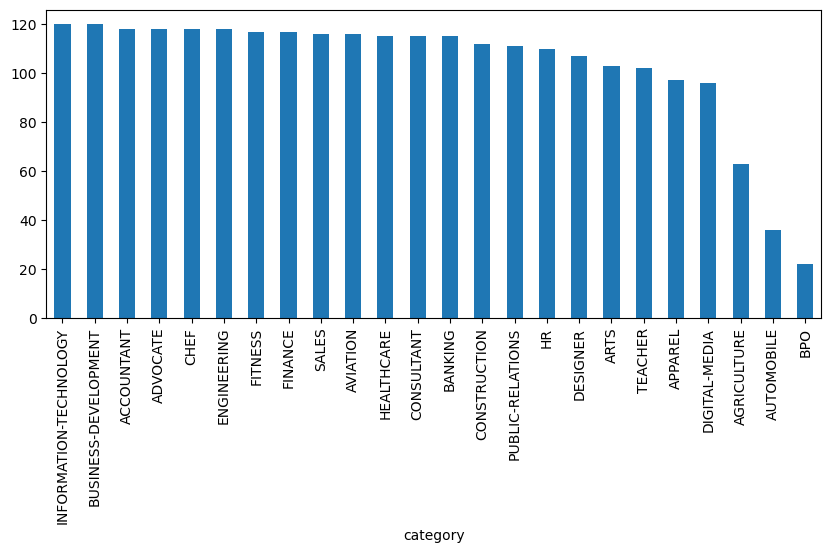

In [7]:
df_clean['category'].value_counts().plot(kind='bar', figsize=(10,4))

In [9]:
!pip install wordcloud

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
stop = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = " ".join([word for word in text.split() if word not in stop])
    return text.strip()

df_clean['clean_text'] = df_clean['text'].apply(clean_text)


In [10]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nicog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
# Mean word length
df_clean['mean_word_length'] = df_clean['clean_text'].map(
    lambda txt: np.mean([len(word) for word in txt.split()]) if isinstance(txt, str) and len(txt.split()) > 0 else 0
)

# Mean sentence length
df_clean['mean_sent_length'] = df_clean['clean_text'].map(
    lambda txt: np.mean([len(sent) for sent in tokenize.sent_tokenize(txt)]) if isinstance(txt, str) else 0
)

df_clean[['category','num_words','mean_word_length','mean_sent_length']].head()

,category,num_words,mean_word_length,mean_sent_length
0,ACCOUNTANT,3466,7.639434,18928.0
118,ACCOUNTANT,1042,7.264507,6123.0
236,ACCOUNTANT,621,7.448852,4046.0
354,ACCOUNTANT,849,7.067454,4783.0
472,ACCOUNTANT,782,7.216458,4592.0


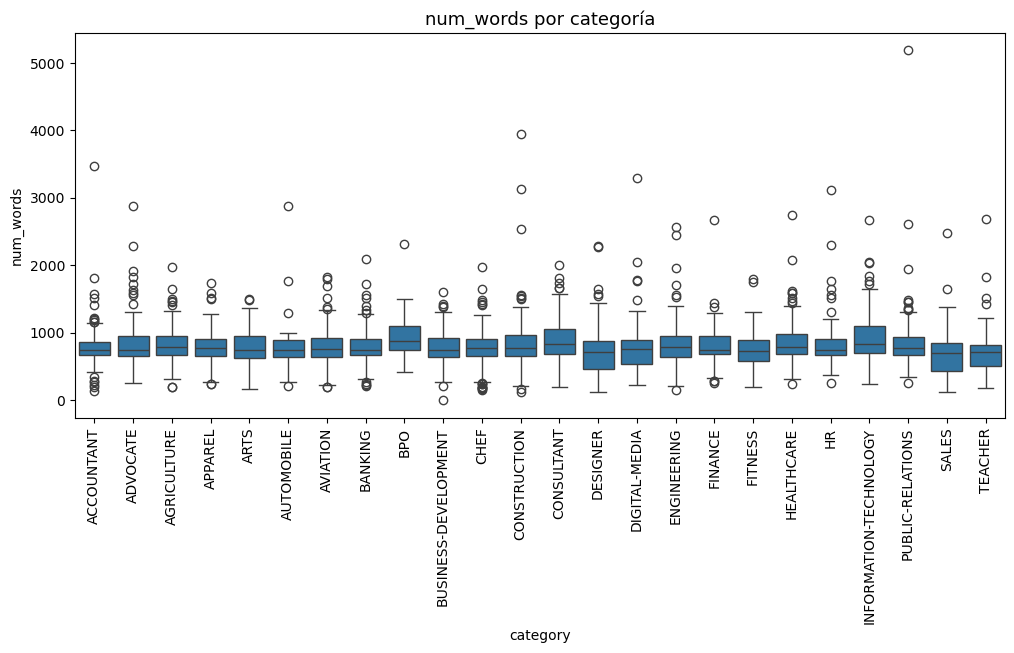

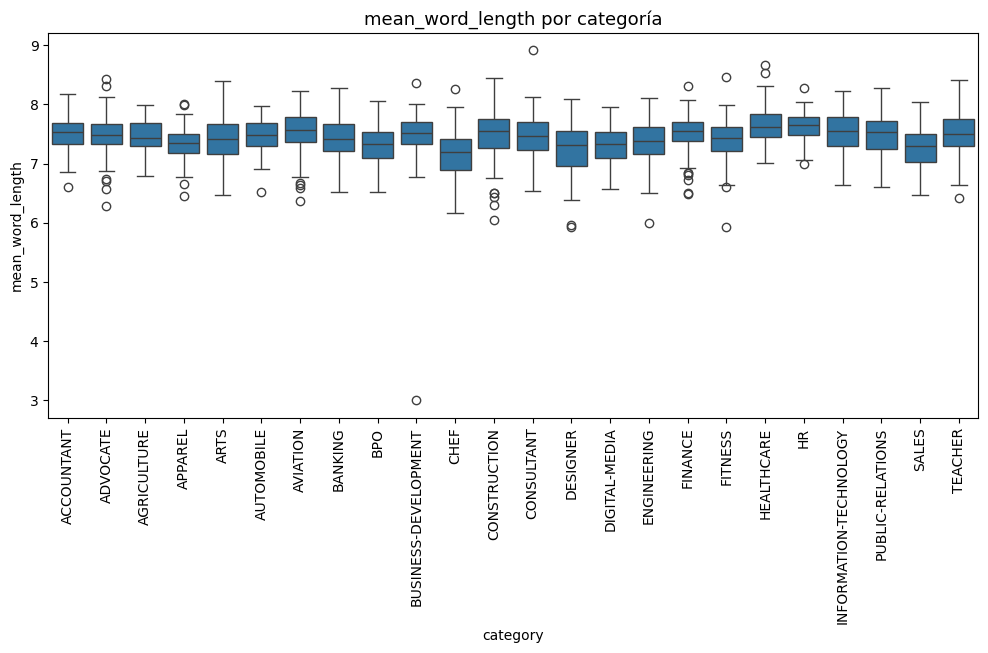

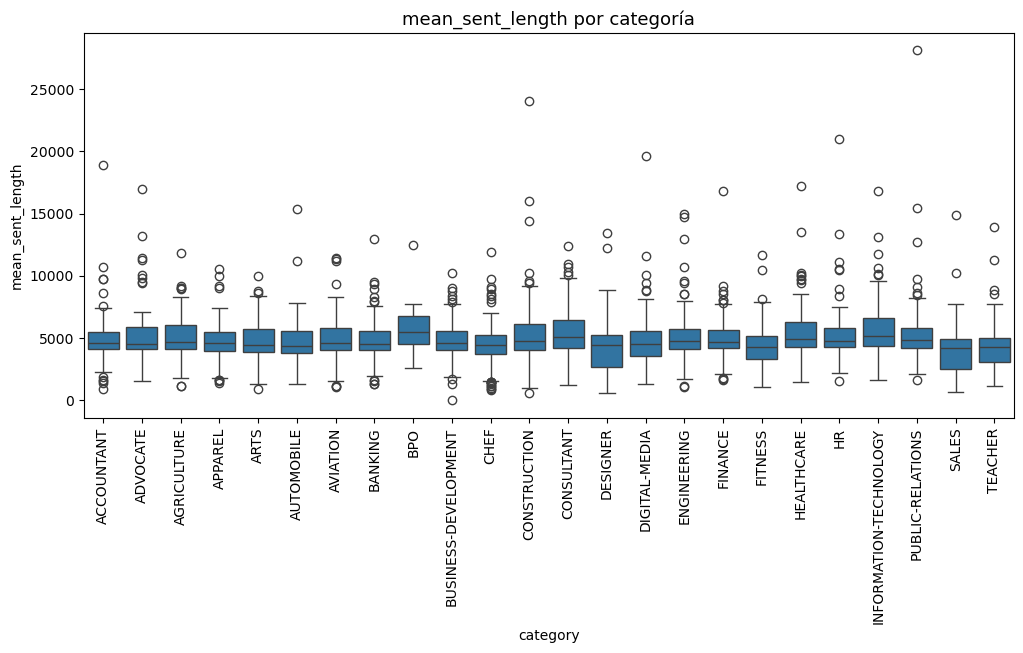

In [12]:
def visualize(col):
    plt.figure(figsize=(12,5))
    sns.boxplot(x='category', y=col, data=df_clean)
    plt.xticks(rotation=90)
    plt.title(f"{col} por categoría", fontsize=13)
    plt.show()

for feature in ['num_words','mean_word_length','mean_sent_length']:
    visualize(feature)


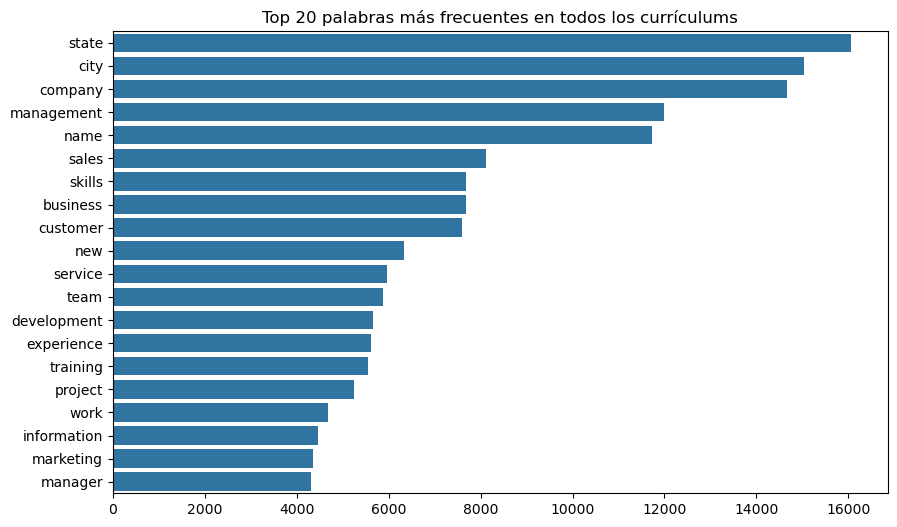

In [13]:
corpus = " ".join(df_clean['clean_text']).split()
most_common = Counter(corpus).most_common(20)

words, freq = zip(*most_common)
plt.figure(figsize=(10,6))
sns.barplot(x=list(freq), y=list(words))
plt.title("Top 20 palabras más frecuentes en todos los currículums")
plt.show()


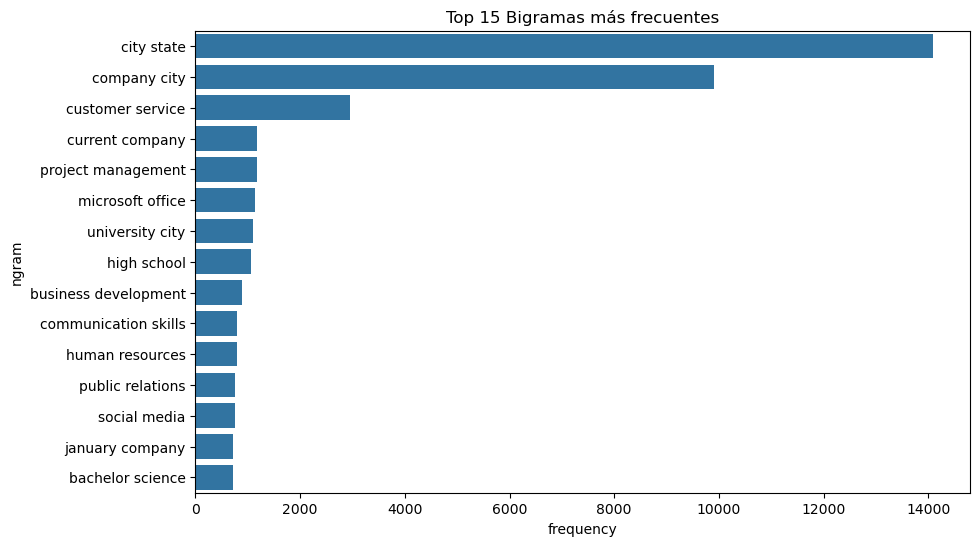

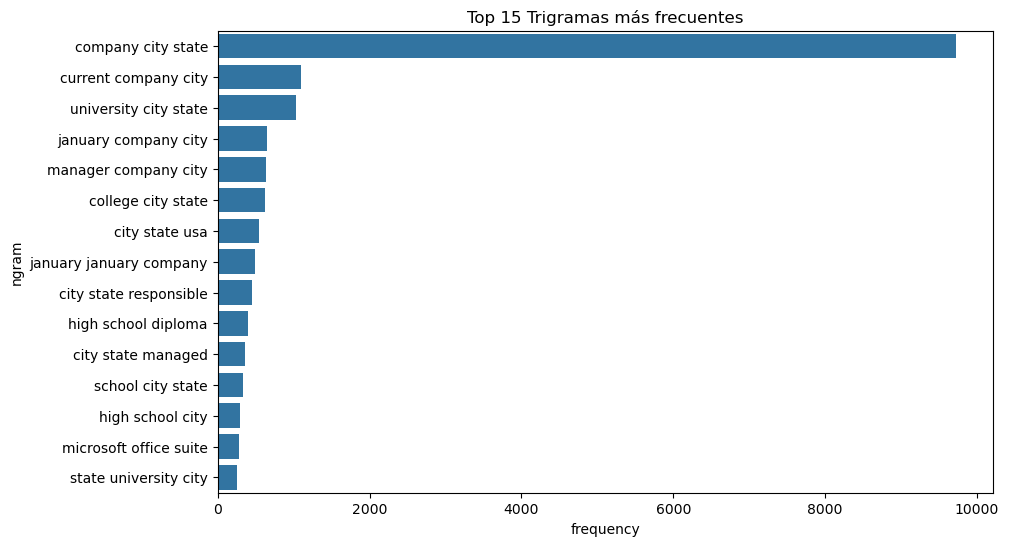

In [14]:
# Bigramas
cv = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=15)
bigrams = cv.fit_transform(df_clean['clean_text'])
count_values = bigrams.toarray().sum(axis=0)
bigram_freq = pd.DataFrame(sorted([(count_values[i], k) for k,i in cv.vocabulary_.items()], reverse=True),
                          columns=['frequency','ngram'])

plt.figure(figsize=(10,6))
sns.barplot(x=bigram_freq['frequency'], y=bigram_freq['ngram'])
plt.title('Top 15 Bigramas más frecuentes')
plt.show()

# Trigramas
cv3 = CountVectorizer(ngram_range=(3,3), stop_words='english', max_features=15)
trigrams = cv3.fit_transform(df_clean['clean_text'])
count_values3 = trigrams.toarray().sum(axis=0)
trigram_freq = pd.DataFrame(sorted([(count_values3[i], k) for k,i in cv3.vocabulary_.items()], reverse=True),
                            columns=['frequency','ngram'])

plt.figure(figsize=(10,6))
sns.barplot(x=trigram_freq['frequency'], y=trigram_freq['ngram'])
plt.title('Top 15 Trigramas más frecuentes')
plt.show()


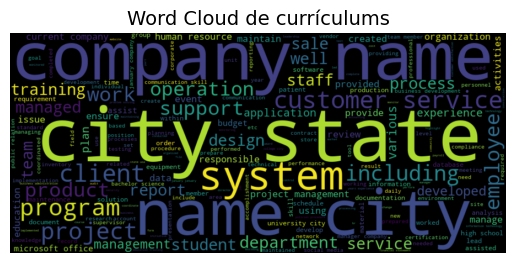

In [15]:
wc = WordCloud(width=900, height=400, background_color='black').generate(" ".join(df_clean['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de currículums", fontsize=14)
plt.show()


In [16]:
output_path = r"C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest\dataset_EDA_completo.csv"
df_clean.to_csv(output_path, index=False, encoding='utf-8')
print(f"✅ Dataset con métricas EDA guardado en:\n{output_path}")


✅ Dataset con métricas EDA guardado en:
C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest\dataset_EDA_completo.csv


In [17]:
import pandas as pd

df_clean = pd.read_csv(r"C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest\dataset_EDA_completo.csv")
df_clean.head()


,category,filename,text,num_chars,num_words,clean_text,mean_word_length,mean_sent_length
0,ACCOUNTANT,10554236.pdf,ACCOUNTANT Summary Financial Accountant specia...,24149,3466,accountant summary financial accountant specia...,7.639434,18928.0
1,ACCOUNTANT,10674770.pdf,STAFF ACCOUNTANT Summary Highly analytical and...,7473,1042,staff accountant summary highly analytical det...,7.264507,6123.0
2,ACCOUNTANT,11163645.pdf,ACCOUNTANT Professional Summary To obtain a po...,4721,621,accountant professional summary obtain positio...,7.448852,4046.0
3,ACCOUNTANT,11759079.pdf,SENIOR ACCOUNTANT Experience Company Name June...,5917,849,senior accountant experience company name june...,7.067454,4783.0
4,ACCOUNTANT,12065211.pdf,SENIOR ACCOUNTANT Professional Summary Senior ...,5555,782,senior accountant professional summary senior ...,7.216458,4592.0


In [18]:
df_clean['clean_text'] = df_clean['clean_text'].fillna("")


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=2000)
X = tfidf.fit_transform(df_clean['clean_text'])

tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out(), index=df_clean.index)

In [20]:
for cat in df_clean['category'].unique()[:5]:
    idx = df_clean['category'] == cat
    cat_mean = tfidf_df[idx].mean().sort_values(ascending=False)[:10]
    print(f"\n{cat.upper()} → {', '.join(cat_mean.index)}")



ACCOUNTANT → accounting, financial, accountant, accounts, tax, ledger, payroll, statements, monthly, state

ADVOCATE → customer, advocate, state, city, service, company, care, patient, health, patients

AGRICULTURE → agriculture, state, city, research, company, management, program, students, data, project

APPAREL → sales, store, state, city, company, customer, apparel, product, merchandising, merchandise

ARTS → students, arts, state, city, school, student, teacher, company, art, customer


In [21]:
df_clean = df_clean.drop(columns=['text'])


In [1]:
!pip install deep-translator tqdm

In [22]:
from deep_translator import GoogleTranslator
import random
from tqdm import tqdm

def back_translate(text, source_lang='en', mid_lang='fr'):
    try:
        inter = GoogleTranslator(source=source_lang, target=mid_lang).translate(text)
        return GoogleTranslator(source=mid_lang, target=source_lang).translate(inter)
    except Exception:
        return text


In [24]:
df_clean.columns


Index(['category', 'filename', 'num_chars', 'num_words', 'clean_text',
       'mean_word_length', 'mean_sent_length'],
      dtype='object')

In [30]:
target_size = df_clean['category'].value_counts().max()  # 120

minor_classes = ["AGRICULTURE", "AUTOMOBILE", "BPO"]
augmented_rows = []

for cat in minor_classes:
    subset = df_clean[df_clean['category'] == cat]
    needed = target_size - len(subset)

    print(f"Augmenting {cat}: necesito {needed} nuevos ejemplos")

    for i in tqdm(range(needed), desc=f"Augmenting {cat}"):
        row = subset.sample(1, random_state=i).iloc[0]
        new_text = back_translate(row['clean_text'])
        augmented_rows.append({'clean_text': new_text, 'category': cat})

df_aug = pd.DataFrame(augmented_rows)
df_balanced = pd.concat([df_clean, df_aug], ignore_index=True)

Augmenting AGRICULTURE: necesito 57 nuevos ejemplos


Augmenting AGRICULTURE: 100%|██████████████████████████████████████████████████████████| 57/57 [00:15<00:00,  3.60it/s]


Augmenting AUTOMOBILE: necesito 84 nuevos ejemplos


Augmenting AUTOMOBILE: 100%|███████████████████████████████████████████████████████████| 84/84 [00:28<00:00,  2.97it/s]


Augmenting BPO: necesito 98 nuevos ejemplos


Augmenting BPO: 100%|██████████████████████████████████████████████████████████████████| 98/98 [00:16<00:00,  5.88it/s]


In [31]:
print("Distribución antes del aumento:")
print(df_clean['category'].value_counts())

print("\nDistribución después del aumento:")
print(df_balanced['category'].value_counts())


Distribución antes del aumento:
category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
FITNESS                   117
FINANCE                   117
SALES                     116
AVIATION                  116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

Distribución después del aumento:
category
AGRICULTURE               120
AUTOMOBILE                120
BUSINESS-DEVELOPMENT      120
BPO                       120
INFORMATION-TECHNOLOGY    120
CHEF               

In [32]:
df_balanced.to_csv(
    r"C:\Users\nicog\Documents\Deep Learning\LLM\Jarvis Calling Hiring Contest\dataset_EDA_completo.csv",
    index=False,
    encoding='utf-8'
)
print("✅ Archivo actualizado guardado correctamente (sin columna 'text').")


✅ Archivo actualizado guardado correctamente (sin columna 'text').
